In [1799]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
import scipy.stats as stats
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error

In [1800]:
flights=pd.read_csv('flights.csv')
users=pd.read_csv('users.csv')
hotels=pd.read_csv('hotels.csv')

In [1801]:
users

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
...,...,...,...,...,...
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52


In [1802]:
flights

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,07/23/2020


In [1803]:
hotels

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019
...,...,...,...,...,...,...,...,...
40547,135938,1339,Hotel BP,Brasilia (DF),3,247.62,742.86,06/18/2020
40548,135939,1339,Hotel BP,Brasilia (DF),1,247.62,247.62,06/25/2020
40549,135940,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
40550,135941,1339,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020


In [1804]:
users=users.rename(columns={'code':'userCode'})
users=users.rename(columns={'name':'name'})
flights=flights.rename(columns={'price':'flight_price'})
flights=flights.rename(columns={'from':'from_location'})
flights=flights.rename(columns={'to':'to_location'})
flights=flights.rename(columns={'date':'flight_date'})
flights=flights.rename(columns={'time':'time(hr)'})
hotels=hotels.rename(columns={'price':'hotel_price'})
hotels=hotels.rename(columns={'total':'total_hotel_price'})
hotels=hotels.rename(columns={'date':'hotel_date'})
hotels=hotels.rename(columns={'name':'hotel_name'})

In [1805]:
data_merged=pd.merge(users,flights,on='userCode')

In [1806]:
travel_datas=pd.merge(data_merged,hotels,on=['userCode','travelCode'])

In [1807]:
travel_datas

,userCode,company,name,gender,age,travelCode,from_location,to_location,flightType,flight_price,time(hr),distance,agency,flight_date,hotel_name,place,days,hotel_price,total_hotel_price,hotel_date
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,0,4You,Roy Braun,male,21,2,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,0,4You,Roy Braun,male,21,7,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81099,1339,Umbrella LTDA,Paul Rodriguez,male,35,135940,Campo Grande (MS),Florianopolis (SC),firstClass,1341.21,1.49,573.81,Rainbow,07/05/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
81100,1339,Umbrella LTDA,Paul Rodriguez,male,35,135941,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,07/09/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
81101,1339,Umbrella LTDA,Paul Rodriguez,male,35,135941,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
81102,1339,Umbrella LTDA,Paul Rodriguez,male,35,135942,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020


In [1808]:
travel_datas.head()

,userCode,company,name,gender,age,travelCode,from_location,to_location,flightType,flight_price,time(hr),distance,agency,flight_date,hotel_name,place,days,hotel_price,total_hotel_price,hotel_date
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,4You,Roy Braun,male,21,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,0,4You,Roy Braun,male,21,2,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,0,4You,Roy Braun,male,21,7,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [1809]:
travel_datas.tail()

,userCode,company,name,gender,age,travelCode,from_location,to_location,flightType,flight_price,time(hr),distance,agency,flight_date,hotel_name,place,days,hotel_price,total_hotel_price,hotel_date
81099,1339,Umbrella LTDA,Paul Rodriguez,male,35,135940,Campo Grande (MS),Florianopolis (SC),firstClass,1341.21,1.49,573.81,Rainbow,07/05/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
81100,1339,Umbrella LTDA,Paul Rodriguez,male,35,135941,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,07/09/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
81101,1339,Umbrella LTDA,Paul Rodriguez,male,35,135941,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
81102,1339,Umbrella LTDA,Paul Rodriguez,male,35,135942,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020
81103,1339,Umbrella LTDA,Paul Rodriguez,male,35,135942,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,07/20/2020,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020


In [1810]:
travel_datas.columns

Index(['userCode', 'company', 'name', 'gender', 'age', 'travelCode',
       'from_location', 'to_location', 'flightType', 'flight_price',
       'time(hr)', 'distance', 'agency', 'flight_date', 'hotel_name', 'place',
       'days', 'hotel_price', 'total_hotel_price', 'hotel_date'],
      dtype='object')

In [1811]:
travel_datas.dtypes

userCode               int64
company               object
name                  object
gender                object
age                    int64
travelCode             int64
from_location         object
to_location           object
flightType            object
flight_price         float64
time(hr)             float64
distance             float64
agency                object
flight_date           object
hotel_name            object
place                 object
days                   int64
hotel_price          float64
total_hotel_price    float64
hotel_date            object
dtype: object

In [1812]:
travel_datas.shape

(81104, 20)

In [1813]:
travel_datas.isna().sum()

userCode             0
company              0
name                 0
gender               0
age                  0
travelCode           0
from_location        0
to_location          0
flightType           0
flight_price         0
time(hr)             0
distance             0
agency               0
flight_date          0
hotel_name           0
place                0
days                 0
hotel_price          0
total_hotel_price    0
hotel_date           0
dtype: int64

In [1814]:
travel_datas['company'].value_counts()

company
4You             28028
Acme Factory     15330
Wonka Company    13412
Umbrella LTDA    12458
Monsters CYA     11876
Name: count, dtype: int64

In [1815]:
travel_datas['agency'].value_counts()

agency
CloudFy        34820
Rainbow        34784
FlyingDrops    11500
Name: count, dtype: int64

In [1816]:
travel_datas.duplicated().sum()

np.int64(0)

In [1817]:
travel_datas['total_expense']=travel_datas['flight_price']+travel_datas['total_hotel_price']
travel_datas['total_expense']


0        2686.46
1        2544.37
2        2210.87
3        2058.74
4        1755.06
          ...   
81099    1522.38
81100    1130.75
81101    1627.51
81102    1698.47
81103    1844.59
Name: total_expense, Length: 81104, dtype: float64

In [1818]:
travel_datas.columns


Index(['userCode', 'company', 'name', 'gender', 'age', 'travelCode',
       'from_location', 'to_location', 'flightType', 'flight_price',
       'time(hr)', 'distance', 'agency', 'flight_date', 'hotel_name', 'place',
       'days', 'hotel_price', 'total_hotel_price', 'hotel_date',
       'total_expense'],
      dtype='object')

In [1819]:
corr=travel_datas.corr(numeric_only=True)
print(corr)

                   userCode       age  travelCode  flight_price  time(hr)  \
userCode           1.000000 -0.050731    0.999895      0.134720  0.314919   
age               -0.050731  1.000000   -0.050597     -0.007785 -0.024059   
travelCode         0.999895 -0.050597    1.000000      0.133183  0.311608   
flight_price       0.134720 -0.007785    0.133183      1.000000  0.641051   
time(hr)           0.314919 -0.024059    0.311608      0.641051  1.000000   
distance           0.314878 -0.024059    0.311572      0.641155  0.999990   
days              -0.004049 -0.002225   -0.004046     -0.000301 -0.001941   
hotel_price       -0.048607  0.007975   -0.047629      0.133249  0.223855   
total_hotel_price -0.032826 -0.000174   -0.032243      0.078858  0.132870   
total_expense      0.076415 -0.005735    0.075676      0.772611  0.547709   

                   distance      days  hotel_price  total_hotel_price  \
userCode           0.314878 -0.004049    -0.048607          -0.032826   
age   

<Axes: >

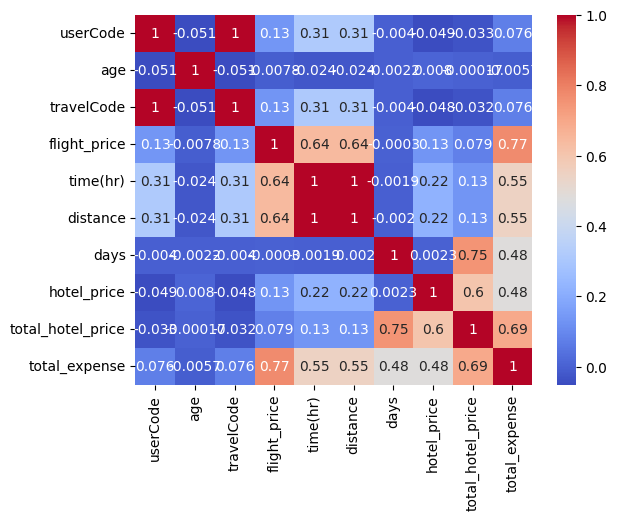

In [1820]:
sns.heatmap(corr,annot=True,cmap='coolwarm')


In [1821]:
categorical_vars=['flight_date','hotel_date']

alpha=0.05

for var in categorical_vars:
    print(f"\nChi-Square Test for {var} vs Total expense")
    
    contingency_table=pd.crosstab(travel_datas[var],travel_datas['total_expense'])
    
    chi2,p,dof,expected=stats.chi2_contingency(contingency_table)

    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    
    if p<alpha:
        print(f"There is a significant relationship between {var} and Total Expense.\n")
    else:
        print(f"No significant relationship between {var} and Total Expense.\n")


Chi-Square Test for flight_date vs Total expense
Chi-square statistic: 3357601.671061783
P-value: 0.0
Degrees of freedom: 3092202
There is a significant relationship between flight_date and Total Expense.


Chi-Square Test for hotel_date vs Total expense
Chi-square statistic: 607758.2332146796
P-value: 0.9999999999999992
Degrees of freedom: 616572
No significant relationship between hotel_date and Total Expense.



In [1822]:
drop_columns=['gender','age','userCode','company','name','travelCode','time(hr)','flight_date','hotel_date','hotel_name','agency']
travel_details=travel_datas.drop(columns=drop_columns)

In [1823]:
travel_details.dtypes

from_location         object
to_location           object
flightType            object
flight_price         float64
distance             float64
place                 object
days                   int64
hotel_price          float64
total_hotel_price    float64
total_expense        float64
dtype: object

In [1824]:
travel_details.columns

Index(['from_location', 'to_location', 'flightType', 'flight_price',
       'distance', 'place', 'days', 'hotel_price', 'total_hotel_price',
       'total_expense'],
      dtype='object')

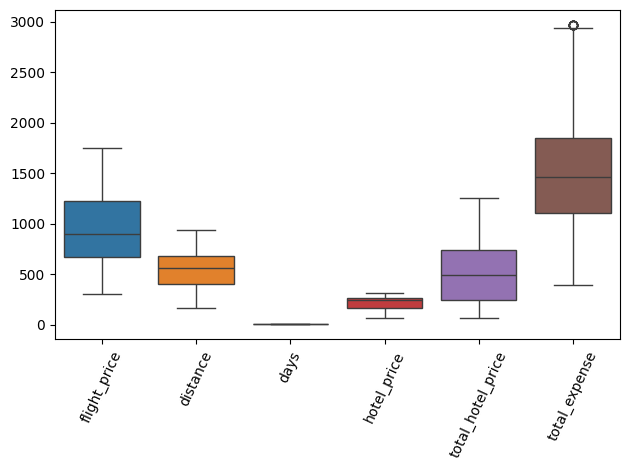

In [1825]:
sns.boxplot(data=travel_details)
plt.xticks(rotation=65)
plt.tight_layout()

In [1826]:
travel_counts=travel_datas.groupby(['from_location','to_location']).size().reset_index(name='count')
travel_counts

,from_location,to_location,count
0,Aracaju (SE),Brasilia (DF),1434
1,Aracaju (SE),Campo Grande (MS),1638
2,Aracaju (SE),Florianopolis (SC),2610
3,Aracaju (SE),Natal (RN),1162
4,Aracaju (SE),Recife (PE),1443
...,...,...,...
65,Sao Paulo (SP),Florianopolis (SC),2064
66,Sao Paulo (SP),Natal (RN),544
67,Sao Paulo (SP),Recife (PE),868
68,Sao Paulo (SP),Rio de Janeiro (RJ),276


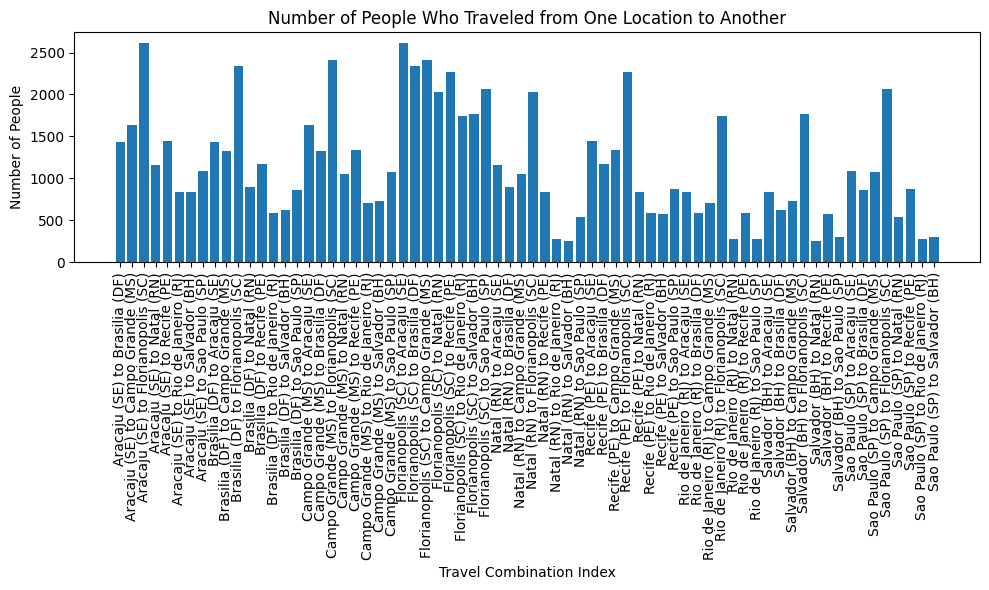

In [1827]:
plt.figure(figsize=(10,6))
plt.bar(travel_counts.index,travel_counts['count'])
plt.xlabel('Travel Combination Index')
plt.ylabel('Number of People')
plt.title('Number of People Who Traveled from One Location to Another')
plt.xticks(travel_counts.index,travel_counts['from_location']+' to '+travel_counts['to_location'],rotation=90)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Hotel Price')

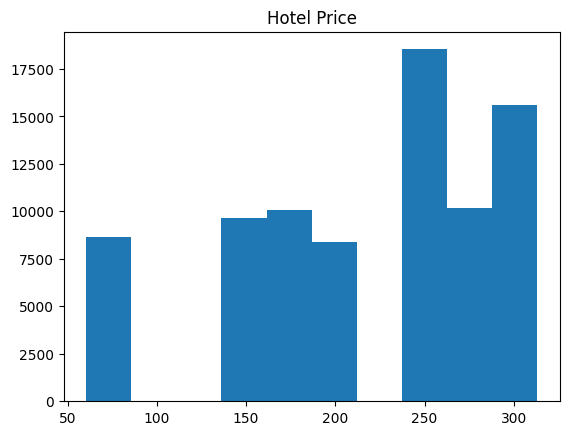

In [1828]:
plt.hist(travel_details.hotel_price)
plt.title('Hotel Price')

Text(0.5, 1.0, 'Flight Price')

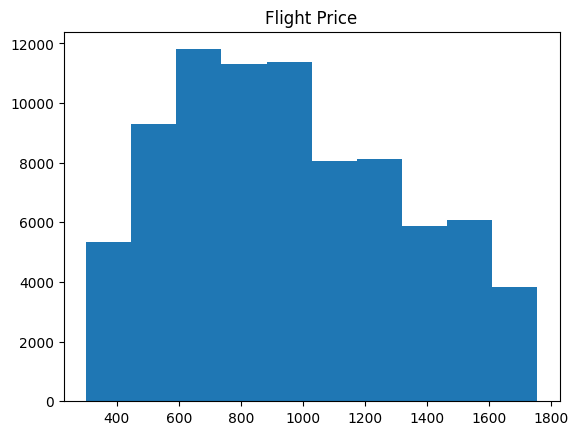

In [1829]:
plt.hist(travel_details.flight_price)
plt.title('Flight Price')

In [1830]:
hotel_price_min=travel_details['hotel_price'].min()
hotel_price_max=travel_details['hotel_price'].max()

print("Minimum Hotel Price: ",hotel_price_min)
print("Maximum Hotel Price: ",hotel_price_max)

Minimum Hotel Price:  60.39
Maximum Hotel Price:  313.02


In [1831]:
flight_price_min=travel_details['flight_price'].min()
flight_price_max=travel_details['flight_price'].max()

print("Minimum Flight Price: ",flight_price_min)
print("Maximum Flight Price: ",flight_price_max)

Minimum Flight Price:  301.51
Maximum Flight Price:  1754.17


In [1832]:
expense_min=travel_details['total_expense'].min()
expense_max=travel_details['total_expense'].max()

print("Minimum Travel Expense: ",expense_min)
print("Maximum Travel Expense: ",expense_max)

Minimum Travel Expense:  395.55
Maximum Travel Expense:  2970.3599999999997


In [1833]:
travel_details.dtypes

from_location         object
to_location           object
flightType            object
flight_price         float64
distance             float64
place                 object
days                   int64
hotel_price          float64
total_hotel_price    float64
total_expense        float64
dtype: object

In [1834]:
travel_details.columns

Index(['from_location', 'to_location', 'flightType', 'flight_price',
       'distance', 'place', 'days', 'hotel_price', 'total_hotel_price',
       'total_expense'],
      dtype='object')

In [1835]:
travel_details['from_location']

0               Recife (PE)
1        Florianopolis (SC)
2              Aracaju (SE)
3             Salvador (BH)
4              Aracaju (SE)
                ...        
81099     Campo Grande (MS)
81100    Florianopolis (SC)
81101     Campo Grande (MS)
81102    Florianopolis (SC)
81103            Natal (RN)
Name: from_location, Length: 81104, dtype: object

In [1836]:
travel_details['from_location']=travel_details['from_location'].apply(lambda x:x.split()[0])
travel_details['to_location']=travel_details['to_location'].apply(lambda x:x.split()[0])
travel_details['place']=travel_details['place'].apply(lambda x:x.split()[0])

In [1837]:
lab=LabelEncoder()
travel_details['flightType']=lab.fit_transform(travel_details['flightType'])

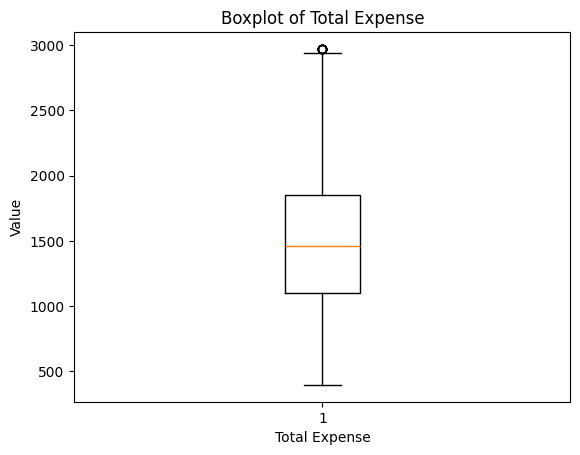

In [1838]:
travel_expense=travel_details['total_expense']
plt.boxplot(travel_expense)
plt.xlabel('Total Expense')
plt.ylabel('Value')
plt.title('Boxplot of Total Expense')
plt.show()

Text(0.5, 1.0, 'PairPlot')

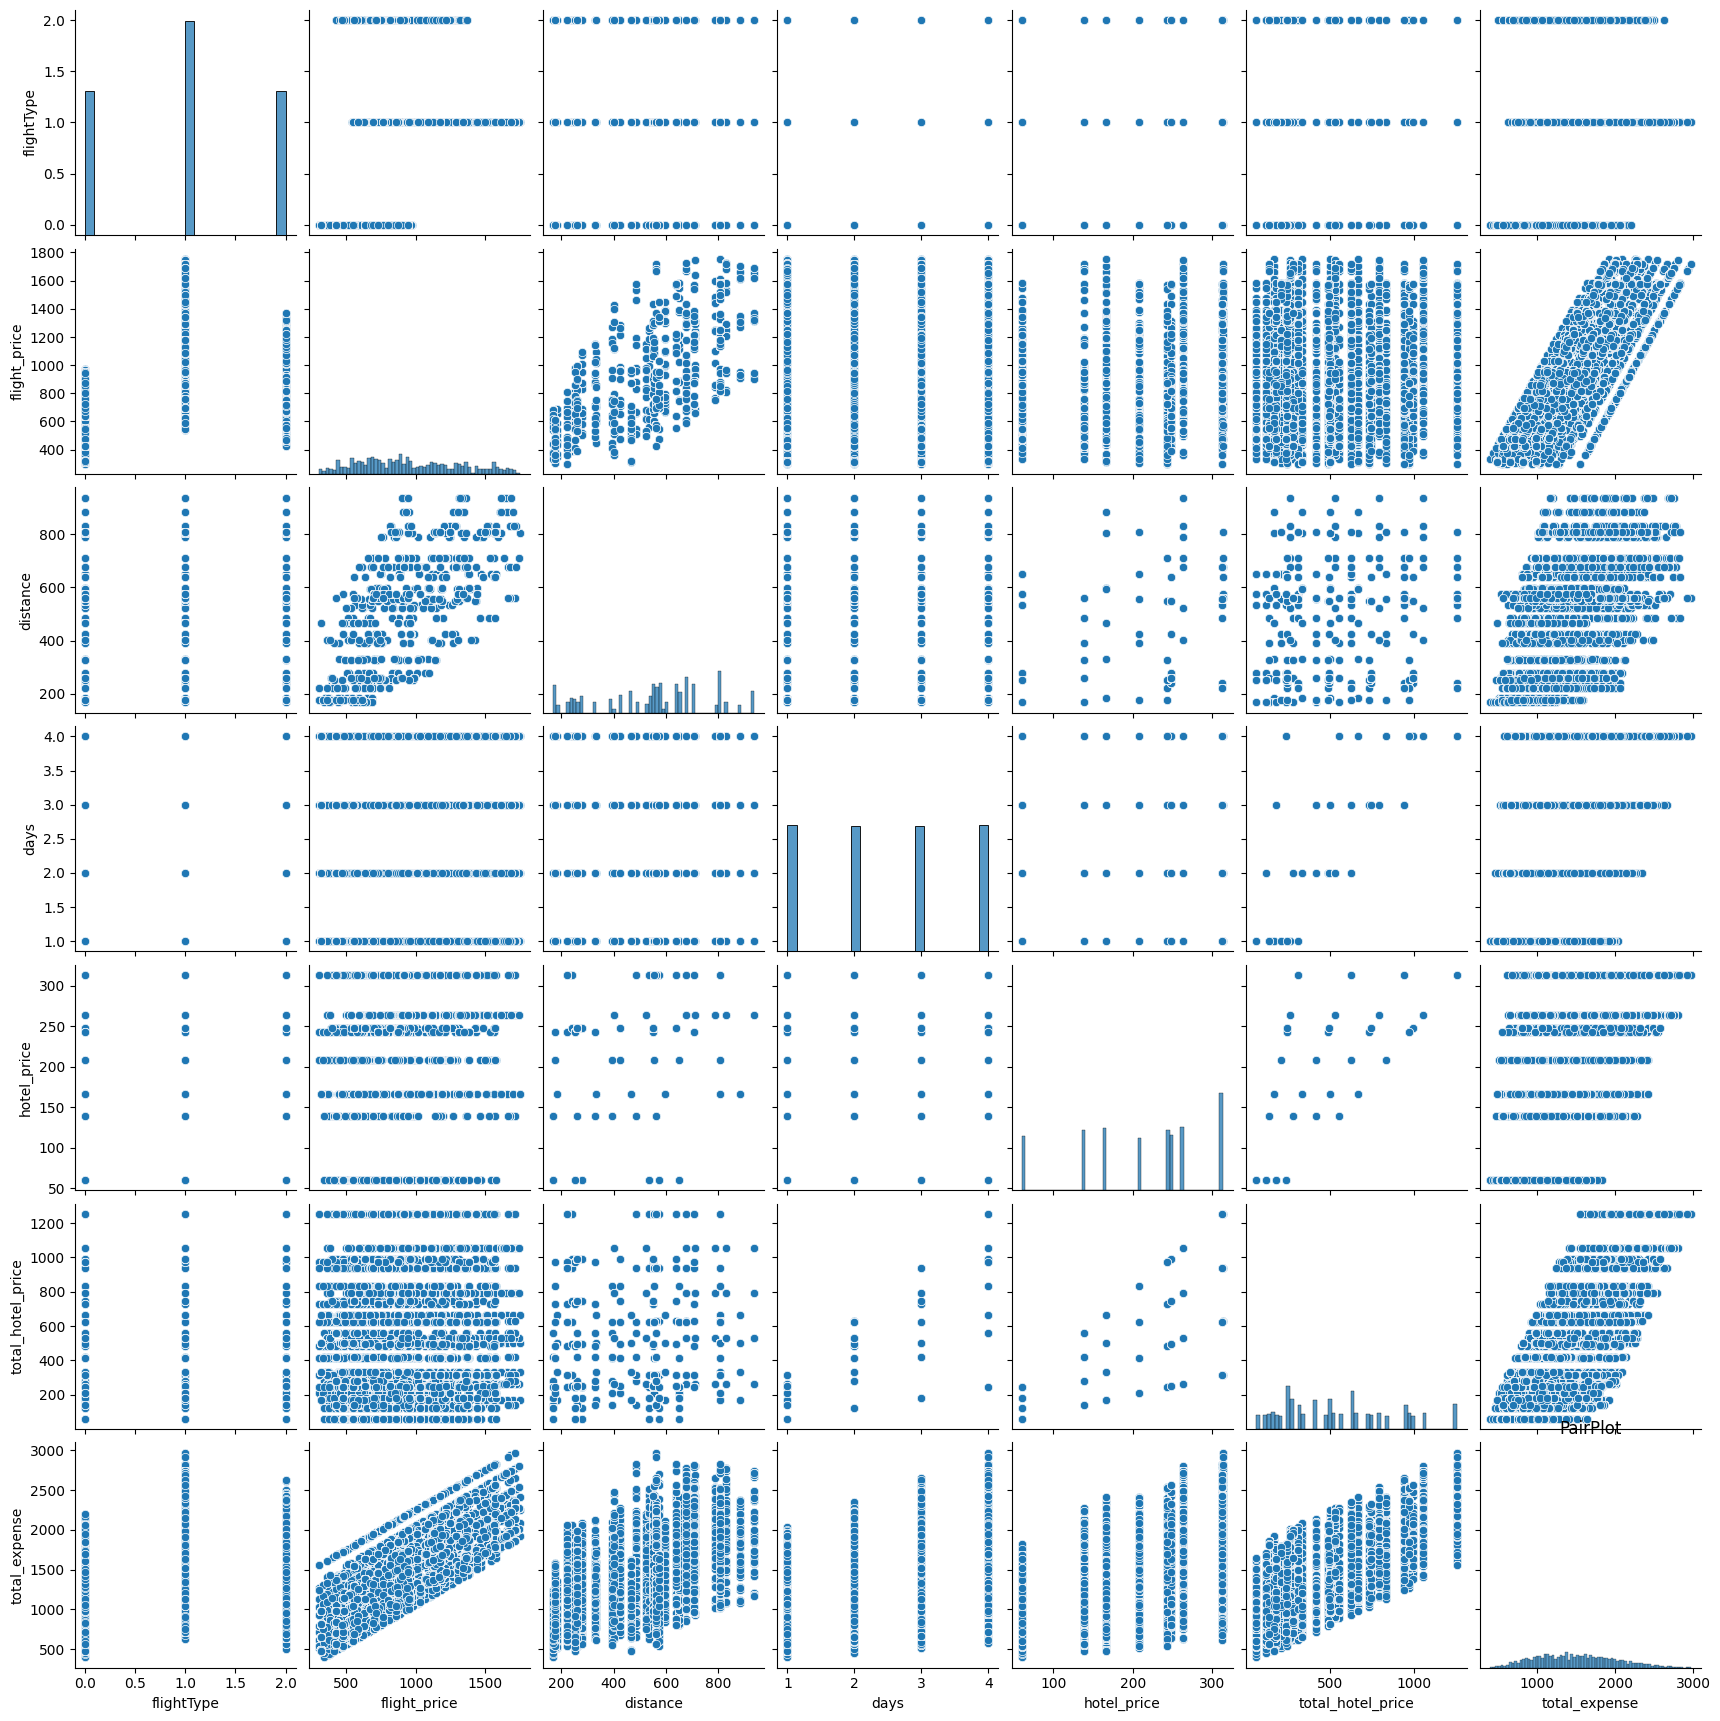

In [1839]:
sns.pairplot(travel_details.iloc[:, :])
plt.title('PairPlot')

In [1840]:
travel_details['from_location'].unique()

array(['Recife', 'Florianopolis', 'Aracaju', 'Salvador', 'Brasilia',
       'Natal', 'Sao', 'Campo', 'Rio'], dtype=object)

In [1841]:
travel_details['to_location'].unique()

array(['Florianopolis', 'Recife', 'Salvador', 'Aracaju', 'Brasilia',
       'Natal', 'Sao', 'Campo', 'Rio'], dtype=object)

In [1842]:
travel_details['place'].unique()

array(['Florianopolis', 'Salvador', 'Natal', 'Aracaju', 'Recife', 'Sao',
       'Campo', 'Rio', 'Brasilia'], dtype=object)

In [1843]:
travel_details['distance'].unique()

array([676.53, 830.86, 676.56, 222.67, 425.98, 555.74, 257.81, 392.76,
       550.69, 535.4 , 788.55, 277.7 , 597.61, 242.21, 183.37, 650.1 ,
       808.85, 637.56, 486.52, 176.33, 885.57, 522.34, 573.81, 250.68,
       168.22, 806.48, 595.03, 562.14, 327.55, 710.57, 709.37, 331.89,
       401.66, 466.3 , 937.77])

In [1844]:
x=travel_details.iloc[:,:-1]
x

,from_location,to_location,flightType,flight_price,distance,place,days,hotel_price,total_hotel_price
0,Recife,Florianopolis,1,1434.38,676.53,Florianopolis,4,313.02,1252.08
1,Florianopolis,Recife,1,1292.29,676.53,Florianopolis,4,313.02,1252.08
2,Aracaju,Salvador,1,1684.05,830.86,Salvador,2,263.41,526.82
3,Salvador,Aracaju,1,1531.92,830.86,Salvador,2,263.41,526.82
4,Aracaju,Salvador,0,964.83,830.86,Salvador,3,263.41,790.23
...,...,...,...,...,...,...,...,...,...
81099,Campo,Florianopolis,1,1341.21,573.81,Campo,3,60.39,181.17
81100,Florianopolis,Campo,1,949.58,573.81,Campo,3,60.39,181.17
81101,Campo,Florianopolis,1,1446.34,573.81,Campo,3,60.39,181.17
81102,Florianopolis,Natal,0,726.95,709.37,Natal,4,242.88,971.52


In [1845]:
y=travel_details.iloc[:,-1]
y

0        2686.46
1        2544.37
2        2210.87
3        2058.74
4        1755.06
          ...   
81099    1522.38
81100    1130.75
81101    1627.51
81102    1698.47
81103    1844.59
Name: total_expense, Length: 81104, dtype: float64

In [1846]:
preprocessor=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['from_location','to_location','place']),remainder='passthrough')
x=preprocessor.fit_transform(x)
x


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 706752 stored elements and shape (81104, 33)>

In [1847]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 494705 stored elements and shape (56772, 33)>

In [1848]:
x_test

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 212047 stored elements and shape (24332, 33)>

In [1849]:
y_train

80712    1456.74
38033     791.04
270       953.55
46120    1566.08
18586    1194.04
          ...   
6265      734.55
54886    1917.95
76820     978.10
860      2275.17
15795    1663.47
Name: total_expense, Length: 56772, dtype: float64

In [1850]:
y_test

45762    1557.59
25770    1448.28
19470    1137.28
60971    1206.56
21442     825.16
          ...   
45872     569.72
46834    2369.61
30902    1138.11
39694    1703.59
10371    2129.90
Name: total_expense, Length: 24332, dtype: float64

In [1851]:
Expensemodel=RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=10,min_samples_leaf=4,max_features='sqrt',random_state=42,n_jobs=-1)
Expensemodel.fit(x_train,y_train)
y_pred=Expensemodel.predict(x_test)
y_pred

array([1555.24907385, 1433.16348612, 1143.67556512, ..., 1101.81154867,
       1745.36711613, 2027.32985741], shape=(24332,))

In [1852]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

41.564476530955105

In [1853]:
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.0322047851884682

In [1854]:
MSE=mean_squared_error(y_test,y_pred)
MSE

2828.185446688917

In [1855]:
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

53.1806867827872

In [1856]:
score=r2_score(y_test,y_pred)
score

0.9889258206818462

In [1857]:
new_data = pd.DataFrame([{
    'from_location': 'Florianopolis',
    'to_location': 'Campo',
    'place': 'Campo' ,
    'flight_price': 949.58,
    'hotel_price': 60.39,
    'distance':573.81,
    'total_hotel_price':181.17,
    'flightType': "firstClass",
    'days':3
}])
new_data['flightType'] = lab.transform(new_data['flightType'])
X_transformed = preprocessor.transform(new_data)

predicted_expense = Expensemodel.predict(X_transformed)

print(f"Predicted Travel Expense: {predicted_expense[0]:.2f}")

Predicted Travel Expense: 1088.23


In [1858]:
import pickle

with open("Travel_Expensemodel.pkl","wb") as f:
    pickle.dump(Expensemodel,f)

with open("preprocessor.pkl","wb") as f:
    pickle.dump(preprocessor,f)